In [365]:
import tensorflow as tf

In [366]:
import keras as K

In [367]:
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [368]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [369]:
from tensorflow.keras.optimizers import Adam

# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (4, 4)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolução mais complexa
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando Dropout
classifier.add(Dropout(0.1))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [370]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   rotation_range=40,  # Rotaciona as imagens
                                   width_shift_range=0.2,  # Deslocamento horizontal
                                   height_shift_range=0.2)  # Deslocamento vertical)

In [371]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('C:/Users/peter/OneDrive/Trabalhos/2024/Tópicos em Engenharia da Computação/dogs-vs-cats/train',
                                                 target_size = (256, 256),
                                                 batch_size = 64,
                                                 class_mode = 'binary')

Found 25000 images belonging to 2 classes.


In [372]:
# Executando o treinamento'
classifier.fit(training_set,
               steps_per_epoch=15,
               epochs=15)

Epoch 1/15
15/15 [==============================] - 29s 2s/step - loss: 0.7048 - accuracy: 0.4979
Epoch 2/15
15/15 [==============================] - 27s 2s/step - loss: 0.6932 - accuracy: 0.4917
Epoch 3/15
15/15 [==============================] - 28s 2s/step - loss: 0.6894 - accuracy: 0.5510
Epoch 4/15
15/15 [==============================] - 28s 2s/step - loss: 0.6855 - accuracy: 0.5542
Epoch 5/15
15/15 [==============================] - 27s 2s/step - loss: 0.6903 - accuracy: 0.5417
Epoch 6/15
15/15 [==============================] - 27s 2s/step - loss: 0.6839 - accuracy: 0.5583
Epoch 7/15
15/15 [==============================] - 27s 2s/step - loss: 0.6726 - accuracy: 0.5729
Epoch 8/15
15/15 [==============================] - 27s 2s/step - loss: 0.6727 - accuracy: 0.5802
Epoch 9/15
15/15 [==============================] - 27s 2s/step - loss: 0.6682 - accuracy: 0.5771
Epoch 10/15
15/15 [==============================] - 26s 2s/step - loss: 0.6567 - accuracy: 0.6036
Epoch 11/15
15/15 [

1/1 [==============================] - 0s 72ms/step
Valor bruto: [[0.60879]]
Previsão: Cachorro.
Acurácia: 60.88 %.


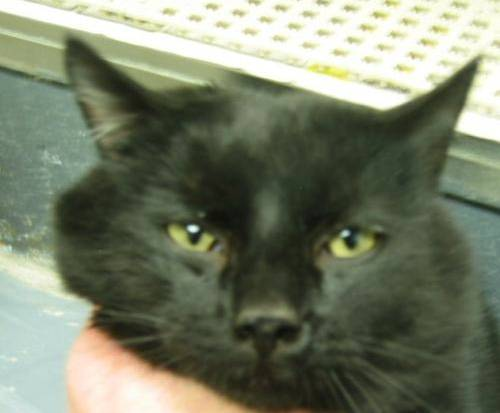

In [377]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('C:/Users/peter/OneDrive/Trabalhos/2024/Tópicos em Engenharia da Computação/dogs-vs-cats/test1/test1/920.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image) / 255
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

print("Valor bruto:", result)

if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='C:/Users/peter/OneDrive/Trabalhos/2024/Tópicos em Engenharia da Computação/dogs-vs-cats/test1/test1/920.jpg')


In [374]:
import os

base_dir = 'C:/Users/peter/OneDrive/Trabalhos/2024/Tópicos em Engenharia da Computação/dogs-vs-cats/train'
print('Número de imagens de cachorros:', len(os.listdir(os.path.join(base_dir, 'train-dogs'))))
print('Número de imagens de gatos:', len(os.listdir(os.path.join(base_dir, 'train-cats'))))

Número de imagens de cachorros: 12501
Número de imagens de gatos: 12501


In [375]:
print(training_set.class_indices)

{'train-cats': 0, 'train-dogs': 1}
